1. **OBJETIVO DEL ANÁLISIS**

- ¿Cuál es el propósito principal del análisis?
    -  El objetivo principal del análisis es entender los patrones de compra, identificar los productos más vendidos y los clientes más valiosos, y detectar posibles tendencias en las ventas. Esto podría ayudar a optimizar inventarios, mejorar estrategias de marketing, y aumentar la satisfacción del cliente.

- ¿Qué preguntas específicas quieres responder?
    - ¿Cuáles son los productos más vendidos?
    - ¿Quiénes son los clientes más valiosos?
    - ¿Hay patrones estacionales o tendencias en las ventas?
    - ¿Qué factores contribuyen a las compras repetidas?

--------

2. **CONTEXTO DEL NEGOCIO**

- ¿Qué tipo de negocio está relacionado con estos datos?
    - El dataset parece estar relacionado con un comercio minorista en línea que vende una variedad de productos. Esto se deduce de la estructura típica de los datos de ventas en línea, que incluyen códigos de productos, descripciones, precios y transacciones con clientes.

- ¿Cuáles son los objetivos generales de la empresa?
    - Aumentar las ventas, mejorar la retención de clientes, optimizar la gestión de inventarios y mejorar la eficiencia en la operación de la tienda en línea.

- ¿Quiénes son los principales interesados (stakeholders)?
    - Directores de ventas, gerentes de marketing, equipos de operaciones y de gestión de inventario, y analistas financieros que se beneficiarían de una mejor comprensión de los datos de ventas y patrones de clientes.

--------

3. **ALCANCE DEL ANÁLISIS**
- ¿Qué aspectos están dentro y fuera del alcance del análisis?
    - Dentro del alcance: análisis de ventas, identificación de productos y clientes clave, patrones estacionales, y tendencias de ventas.
    - Fuera del alcance: análisis detallado de la logística de entrega, estudio de competencia directa, o análisis de satisfacción del cliente basado en feedback no presente en el dataset.

- ¿Qué limitaciones deben tenerse en cuenta?
    - Limitaciones pueden incluir la calidad de los datos (posibles valores faltantes o erróneos), el periodo temporal cubierto por los datos, y la falta de datos cualitativos sobre la experiencia del cliente.

--------

4. **RESULTADOS ESPERADOS**

- ¿Qué tipo de resultados se espera del análisis?
    - Informes detallados que identifiquen los productos más vendidos y los clientes más valiosos.
    - Visualizaciones que muestren tendencias y patrones en las ventas.
    - Posibles modelos predictivos para proyectar ventas futuras o recomendar estrategias de marketing.

- ¿Cómo se utilizarán estos resultados?
    - Los resultados se utilizarán para tomar decisiones estratégicas sobre inventarios, campañas de marketing, y para mejorar la experiencia del cliente y aumentar las ventas.
--------

### Limpieza de Datos

In [ ]:
pip install pandas
pip install numpy
pip install matplotlib

In [24]:
import pandas as pd

# Leer archivo y cargar el dataset
file_path = './Pandas/online_retail.csv'
data = pd.read_csv(file_path, encoding='latin1')

In [25]:
# Imprimir la información del dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [26]:
# Print de las 5 primeras filas
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


In [27]:
# Información general de las columnas numéricas
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [28]:
# Verificación de cantidad de datos nulos por cada columna
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [29]:
# Verificación de la cantidad de datos duplicados
data.duplicated().sum()

np.int64(5268)

In [30]:
# Verificación de la cantidad valores únicos por columna
unique_values = {col: data[col].unique() for col in data.columns}

for col, values in unique_values.items():
    print(f'Columna: {col}')
    print(f'Número de valores únicos: {len(values)}')
    print(f'Valores únicos: {values[:10]}') # Imprimo los 10 primeros
    print('-' * 50)

Columna: InvoiceNo
Número de valores únicos: 25900
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna: StockCode
Número de valores únicos: 4070
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna: Description
Número de valores únicos: 4224
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna: Quantity
Número de valores únicos: 722
Valores únicos: [ 6  8  2 32  3  4 24 12 48 18]
-------------------------------------------------

In [31]:
# En un nuevo dataset, borramos los duplicados y los datos faltantes/nulos en la columna Customer ID
data_cleaned = data.drop_duplicates()

data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [32]:
# Verificamos la cantidad de datos nulos confirmando que ya no hay más de estos
data_cleaned.isnull().sum() 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [37]:
# Verificamos la cantidad de datos duplicados
sum(data_cleaned.duplicated())

0

In [38]:
# Observamos la estructura de nuestros datos/tabla
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [39]:
# Creamos una nueva columna montototal = (precio unitario * cantidad)
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

In [40]:
# Observamos la nueva columna creada
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [44]:
# Conversión de fecha con formato objet a datetime en la columna InvoiceDate
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

In [43]:
# Observamos la modificación realizada
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [45]:
# Observamos info general. Nótese que ahora el tipo de dato de la columna InvoiceDate es una serie de tiempo en formato datetime
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [46]:
# Creamos dos nuevas columnas: año y mes
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month

In [47]:
# Observamos las columnas creadas
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


Habiendo limpiado los datos y luego de crear las columnas que agregaron o separaron datos de interés, procedemos a la obtensión de los "insights"

In [49]:
# Creo un datafrase sales_by_year realizando un groupby para obtener la suma del total obtenido por año
# Agrupa por 'year' y suma el 'TotalAmount' de cada año
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
sales_by_year

Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64

In [50]:
# Ahora realizamos el mismo análisis pero semestralmente
# Creo una nueva columna llamada semester, recorriendo la columna month para verificar si el mes pertenece o no al primer o segundo semestre
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x:1 if x<=6 else 2)

In [51]:
# Observo la columna creada
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2


In [52]:
# Creo una varible que muestre los datos agrupados: año, semestre y el monto total correspondiente según corresponda
sales_by_semester = data_cleaned.groupby(['Year', 'Semester'])['TotalAmount'].sum()
sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

In [54]:
# Mostrar las devoluciones (todos los registros con valores negativos en la columna quantity)
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0]
total_returns

8872

In [55]:
# Mostrar los registros NO devueltos. Ver cantidad de registros.
total_non_returns = data_cleaned[data_cleaned['Quantity'] >= 0].shape[0]
total_non_returns

392732

Teniendo esta información, realizamos un gráficos para ver la proporción entre cada uno.

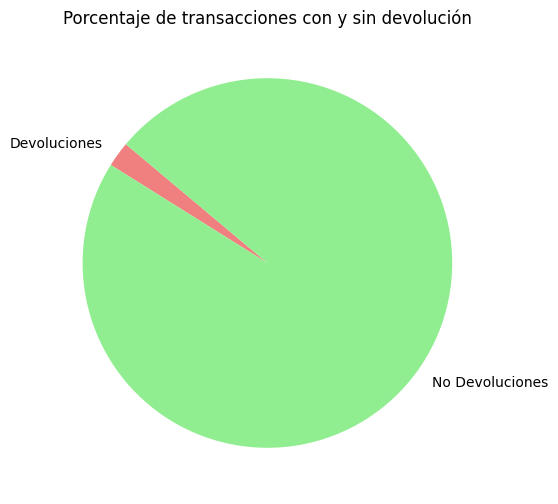

In [56]:
import matplotlib.pyplot as plt

labels = ['Devoluciones', 'No Devoluciones']
sizes = [total_returns, total_non_returns]
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, colors=colors, startangle=140)

plt.title('Porcentaje de transacciones con y sin devolución')
plt.show()

In [58]:
# Agregar una columna categórica basada en el monto total de la trasancción
def categorize_total_amount(amount):
    if amount < 20:
        return 'Low'
    elif 20 <= amount < 100:
        return 'Medium'
    else:
        return 'High'

data_cleaned['AmountCategory'] = data_cleaned['TotalAmount'].apply(categorize_total_amount)

# Mostrar las primeras gilas con las nuevas columnas
data_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,Medium
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,Medium
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,Medium


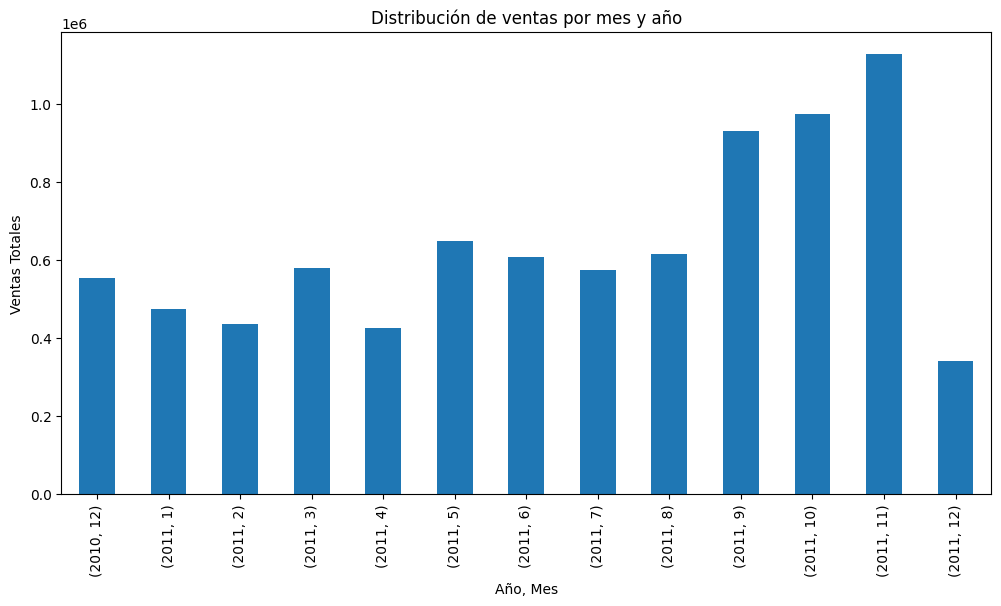

In [59]:
# Creamos la figura del dataframe con una nueva columna
plt.figure(figsize=(12, 6))
data_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(kind='bar')
plt.title('Distribución de ventas por mes y año')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas Totales')
plt.show()

In [60]:
top_productos = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_productos = top_productos.reset_index()
top_productos = pd.merge(top_productos, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                         on='StockCode', how='left')

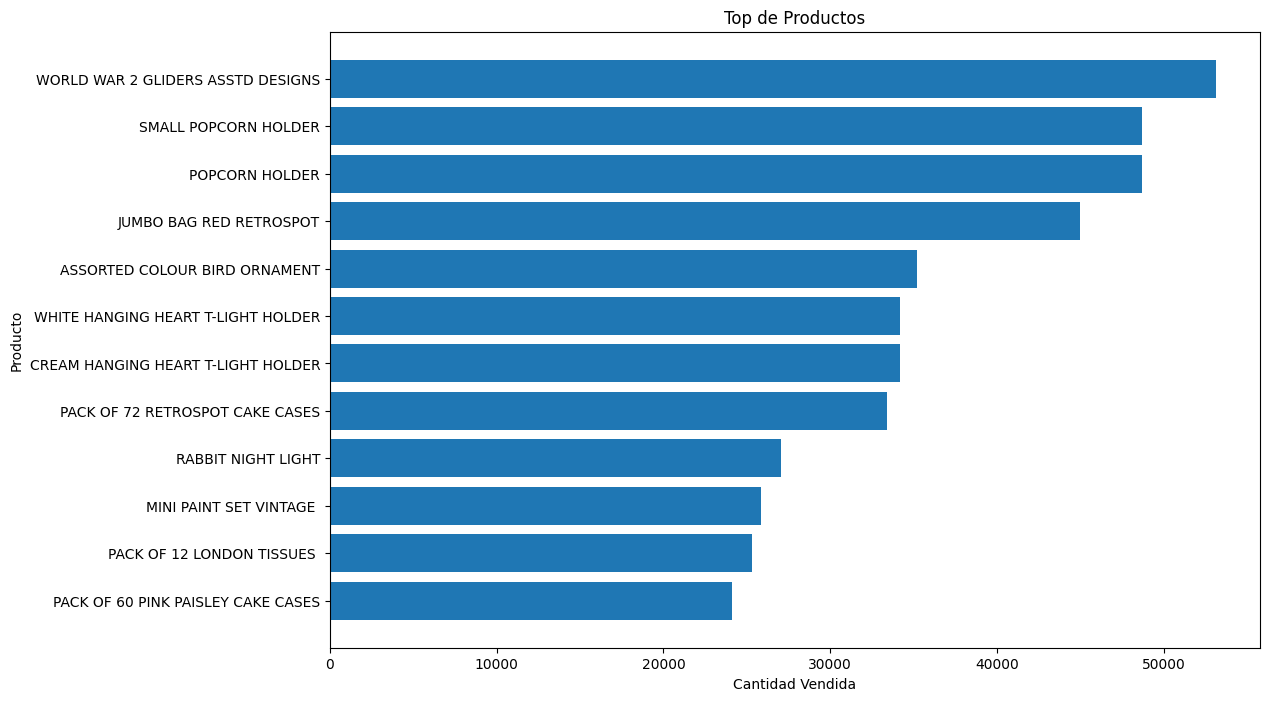

In [61]:
plt.figure(figsize=(12, 8))
plt.barh(top_productos['Description'], top_productos['Quantity'])
plt.title('Top de Productos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()

plt.show()